In [4]:
!pip install pandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 95.2 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 107.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 105.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 36.3 MB/s eta 0:00:00


In [297]:
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

OUT_DIR = "./figures/"
if not os.path.exists(OUT_DIR): os.mkdir(OUT_DIR)

color_mapping = None

In [298]:
files = os.listdir("./results/cataract101/split_1/")
files.sort()
cases = files[::2]
cases

['case_350',
 'case_738',
 'case_788',
 'case_799',
 'case_825',
 'case_827',
 'case_853',
 'case_880',
 'case_889',
 'case_922']

In [299]:
def get_labels_start_end_time(frame_wise_labels, bg_class=["background"]):
    labels = []
    starts = []
    ends = []
    last_label = frame_wise_labels[0]
    if frame_wise_labels[0] not in bg_class:
        labels.append(frame_wise_labels[0])
        starts.append(0)
    for i in range(len(frame_wise_labels)):
        if frame_wise_labels[i] != last_label:
            if frame_wise_labels[i] not in bg_class:
                labels.append(frame_wise_labels[i])
                starts.append(i)
            if last_label not in bg_class:
                ends.append(i)
            last_label = frame_wise_labels[i]
    if last_label not in bg_class:
        ends.append(i)
    return labels, starts, ends

def read_file(path): 
    with open(path, 'r') as f: 
        content = f.read()
    return content

def survey(results, category_names, colors):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    
    fig, ax = plt.subplots(figsize=(25, 3))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data))

    #print(data)
    #print(data_cum)
    #print(np.sum(data))
    
    for i, (colname, color) in enumerate(zip(category_names, colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh([""], widths, left=starts, height=0.5, label=colname, color=color)

        r, g, b = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    
    #ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
    return fig, ax

In [360]:
dataset = "cataract101"
split = 1

case = cases[8]
pred_path = f"./results/{dataset}/split_{split}/{case}"
gt_path = f"./data/{dataset}/groundTruth/{case}.txt"

predictions = read_file(pred_path).split('\n')[1].split()
ground_truth = read_file(gt_path).split('\n')
labels_gt, start_gt, end_gt = get_labels_start_end_time(ground_truth)
labels_pred, start_pred, end_pred = get_labels_start_end_time(predictions)

colors = np.random.rand(len(labels),3)
color_mapping = {labels_gt[i]: colors[i,:] for i in range(len(labels_gt))} if color_mapping == None else color_mapping

data_gt = {"Ground Truth":[end_gt[i] - start_gt[i] for i, elm in enumerate(start_gt)]}
data_pred = {"Prediction": [end_pred[i] - start_pred[i] for i, elm in enumerate(start_pred)]}

{'action_start': array([0.87589282, 0.82976249, 0.54506304]), 'incision': array([0.01071338, 0.18166259, 0.25425832]), 'viscous_agent_injection': array([0.32449041, 0.22563798, 0.32480318]), 'rhexis': array([0.59483203, 0.40617359, 0.53580758]), 'hydrodissection': array([0.55701679, 0.71840251, 0.60680427]), 'phacoemulsificiation': array([0.5430579 , 0.08073757, 0.87866655]), 'irrigation_aspiration': array([0.57046833, 0.78972773, 0.10705577]), 'capsule_polishing': array([0.2194695 , 0.00487859, 0.42472359]), 'lens_implant_settingup': array([0.92929366, 0.84718787, 0.61423043]), 'viscous_agent_removal': array([0.72210082, 0.053143  , 0.74643625]), 'tonifying_antibiotics': array([0.04191664, 0.58166655, 0.8619399 ]), 'action_end': array([0.65803203, 0.02853505, 0.22484974])} ['action_start', 'incision', 'viscous_agent_injection', 'rhexis', 'hydrodissection', 'phacoemulsificiation', 'irrigation_aspiration', 'capsule_polishing', 'viscous_agent_injection', 'lens_implant_settingup', 'viscou

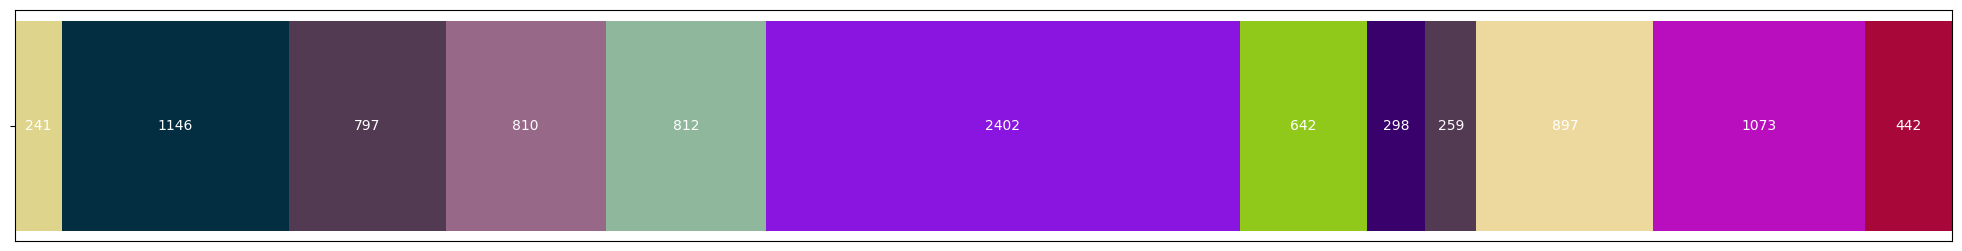

In [361]:
print(color_mapping, labels_gt)
colors_gt = [color_mapping[elm] for elm in labels_gt]
fig, ax = survey(data_gt, labels_gt, colors_gt)
plt.show()
fig.savefig(OUT_DIR + case + "_gt.png")

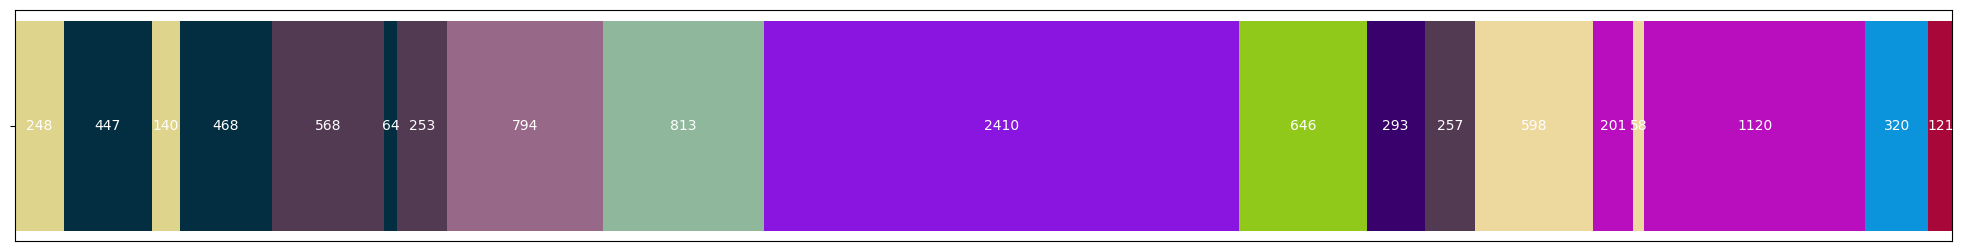

In [362]:
colors_pred = [color_mapping[elm] for elm in labels_pred]
fig, ax = survey(data_pred, labels_pred, colors_pred)
plt.show()
fig.savefig(OUT_DIR + case + "_pred.png")